<a href="https://colab.research.google.com/github/ikrarmuhamad/Image-Detection/blob/main/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import matplotlib.image as mpimg
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

--2023-09-27 07:23:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 142.251.171.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   152MB/s    in 0.7s    

2023-09-27 07:23:46 (152 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Data Overview

In [ ]:
import zipfile

zip = zipfile.ZipFile("pizza_steak.zip", "r")
zip.extractall()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
img = random.sample(os.listdir('pizza_steak/train/steak'), 1)
img[0]

'2761427.jpg'

In [ ]:
def view_image(target_folder, type_target, target_name):
  folder = target_folder + '/' + type_target + '/' + target_name
  img = random.sample(os.listdir(folder), 1)
  image = mpimg.imread(folder + '/' + img[0])
  plt.imshow(image)
  plt.title(target_name)
  plt.axis('off')
  print(f"Image shape: {image.shape}")

Image shape: (512, 384, 3)


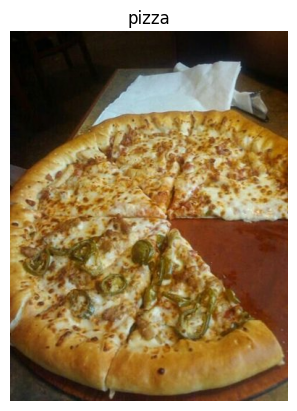

In [ ]:
view_image('pizza_steak', 'train' ,'pizza')

# Preprocessing Data Image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'pizza_steak/train/'
test_data_dir = 'pizza_steak/test/'

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_data_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_data_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

## CNN

In [ ]:
from tensorflow import keras

In [ ]:
# Create model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64,
                        kernel_size = 3,
                        strides = 1,
                        padding = 'valid',
                        input_shape = (224, 224, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fit the model
history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch=len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 271s 6s/step - loss: 0.6313 - accuracy: 0.6173 - val_loss: 0.4648 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 253s 5s/step - loss: 0.4484 - accuracy: 0.7953 - val_loss: 0.3503 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 263s 6s/step - loss: 0.3913 - accuracy: 0.8360 - val_loss: 0.3531 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 233s 5s/step - loss: 0.3722 - accuracy: 0.8440 - val_loss: 0.3025 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 263s 6s/step - loss: 0.3414 - accuracy: 0.8660 - val_loss: 0.2802 - val_accuracy: 0.8960


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
model.evaluate(valid_data)

16/16 [==============================] - 2s 113ms/step - loss: 0.2917 - accuracy: 0.8720


[0.2916620969772339, 0.871999979019165]

<Axes: >

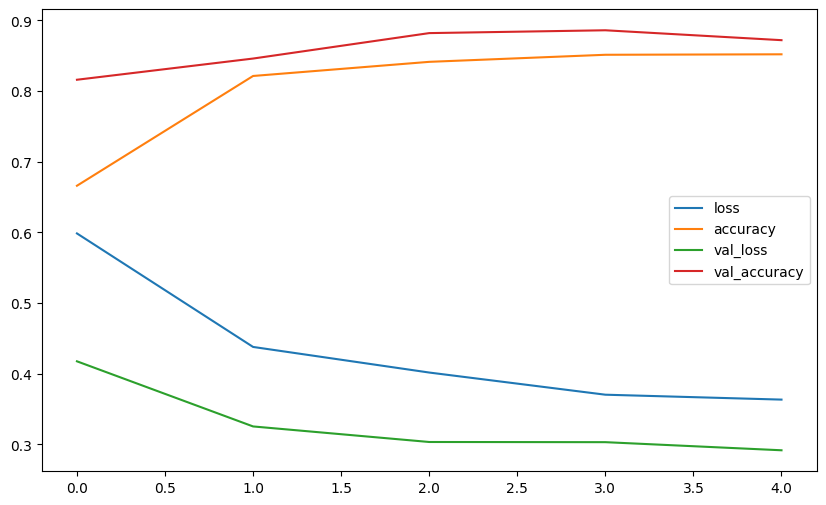

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))

In [ ]:
!wget 'https://bakeitwithlove.com/wp-content/uploads/2022/06/steak-marinade-sq.jpg'

--2023-09-27 03:35:45--  https://www.unileverfoodsolutions.co.id/dam/global-ufs/mcos/SEA/calcmenu/recipes/ID-recipes/red-meats-&-red-meat-dishes/roasted-rib-eye-steak/main-header.jpg/jcr:content/renditions/cq5dam.thumbnail.desktop.jpeg
Resolving www.unileverfoodsolutions.co.id (www.unileverfoodsolutions.co.id)... 184.50.40.175
Connecting to www.unileverfoodsolutions.co.id (www.unileverfoodsolutions.co.id)|184.50.40.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88017 (86K) [image/jpeg]
Saving to: ‘cq5dam.thumbnail.desktop.jpeg’

cq5dam.thumbnail.de 100%[===================>]  85.95K   421KB/s    in 0.2s    

2023-09-27 03:35:46 (421 KB/s) - ‘cq5dam.thumbnail.desktop.jpeg’ saved [88017/88017]



(-0.5, 1199.5, 1199.5, -0.5)

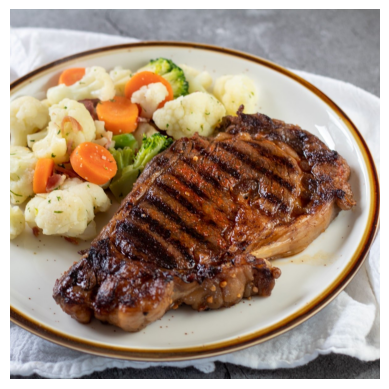

In [ ]:
steak = mpimg.imread('steak-marinade-sq.jpg')
plt.imshow(steak)
plt.axis('off')

In [ ]:
steak.shape

(1200, 1200, 3)

In [ ]:
def load_prep(file, shape = 224):
  img = tf.io.read_file(file)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [shape, shape])
  img = img/255.
  return img

In [ ]:
tes = load_prep('steak-marinade-sq.jpg')

In [ ]:
preds = model.predict(tf.expand_dims(tes, axis = 0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred = class_names[int(tf.round(preds)[0][0])]
pred

'steak'

In [ ]:
def plot_pred(model, file, class_names):
  from PIL import Image
  img = Image.open(file)
  img.save(file, 'JPEG')
  img = load_prep(file)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  clas = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f'Prediction : {clas}')
  plt.axis('off')

1/1 [==============================] - 0s 20ms/step


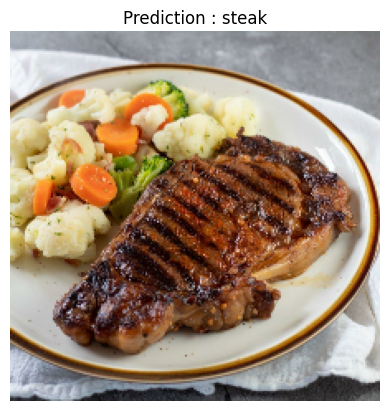

In [ ]:
plot_pred(model, 'steak-marinade-sq.jpg', class_names)

In [ ]:
!wget 'https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg'

--2023-09-27 04:10:05--  https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg
Resolving www.foodandwine.com (www.foodandwine.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.foodandwine.com (www.foodandwine.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171691 (168K) [image/jpeg]
Saving to: ‘reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg’

reverse-sear-steak- 100%[===================>] 167.67K  --.-KB/s    in 0.03s   

2023-09-27 04:10:05 (6.28 MB/s) - ‘reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg’ saved [171691/171691]



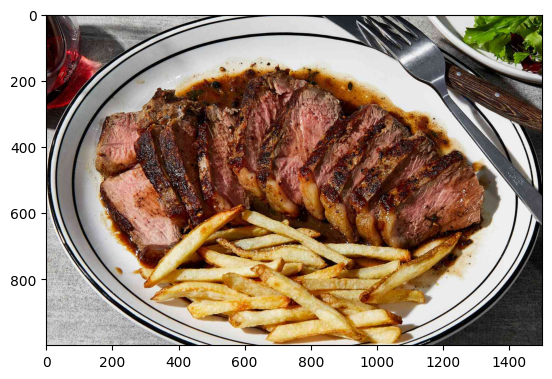

In [ ]:
tes = mpimg.imread('reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg')
plt.imshow(tes)

1/1 [==============================] - 0s 41ms/step


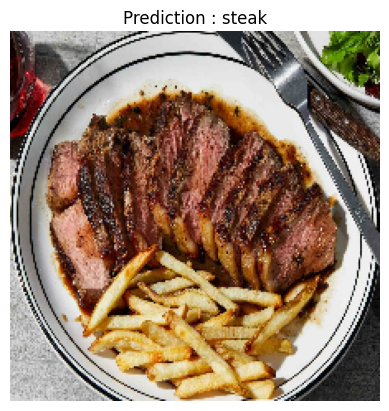

In [ ]:
plot_pred(model, 'reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg', class_names)